<a href="https://colab.research.google.com/github/u3258509/Capstone-Project/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(<matplotlib.image.AxesImage at 0x7b485bcae080>, Text(0.5, 1.0, 'Desert-Test'))

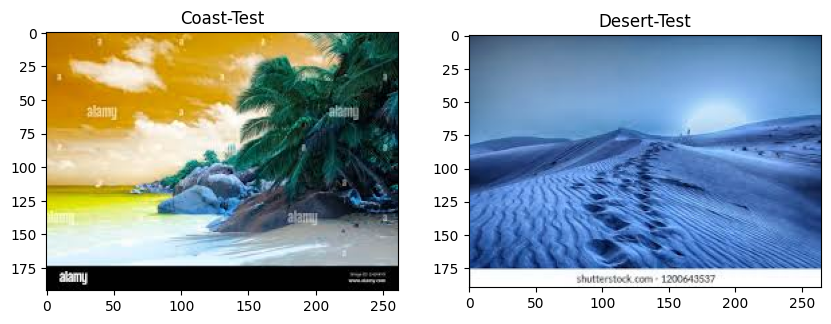

In [ ]:

#Step 1 EDA: Read and Display Images
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img_path_1 = '/content/drive/MyDrive/archive/Landscape Classification/Landscape Classification/Testing Data/Coast/Coast-Test (1).jpeg'
img_1 = cv2.imread(img_path_1)
img_path_2 = '/content/drive/MyDrive/archive/Landscape Classification/Landscape Classification/Testing Data/Desert/Desert-Test (1).jpeg'
img_2 = cv2.imread(img_path_2)
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.subplot(121)
plt.imshow(img_1),plt.title('Coast-Test')
plt.subplot(122)
plt.imshow(img_2),plt.title('Desert-Test')


(<matplotlib.image.AxesImage at 0x7a0f54ae3760>,
 Text(0.5, 1.0, 'Transposed image\n Desert-Test'))

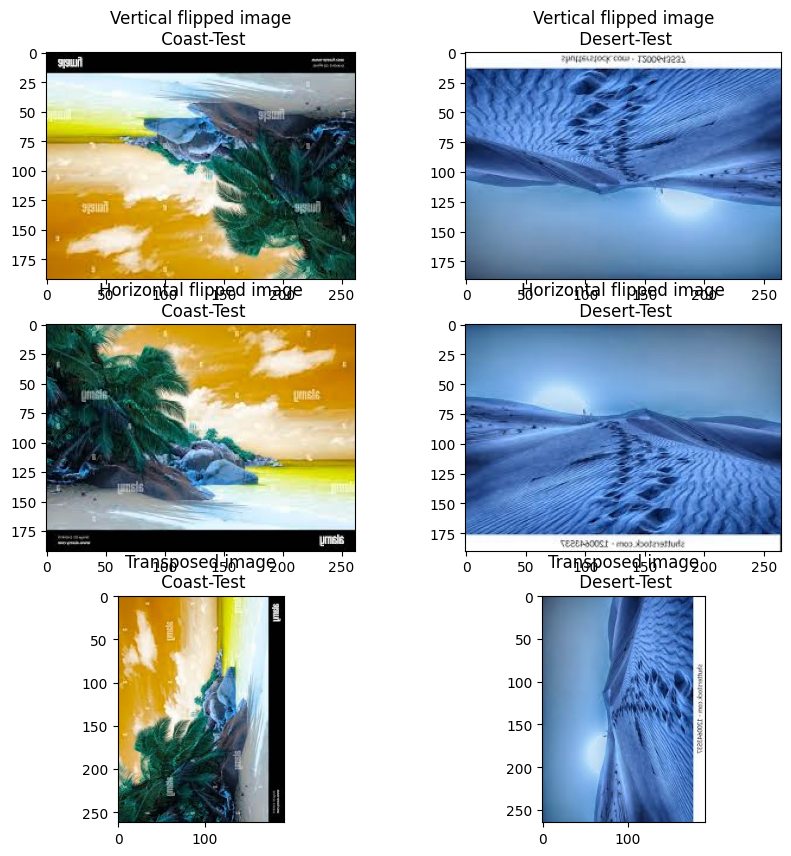

In [ ]:
#Step 2 EDA- Geometric transformation analysis of images
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img_path_1 = '/content/drive/MyDrive/archive/Landscape Classification/Landscape Classification/Testing Data/Coast/Coast-Test (1).jpeg'
img_1 = cv2.imread(img_path_1)
img_path_2 = '/content/drive/MyDrive/archive/Landscape Classification/Landscape Classification/Testing Data/Desert/Desert-Test (1).jpeg'
img_2 = cv2.imread(img_path_2)

#Basic image manipulation (rotating/flipping/transpose)
flip_img_v1=cv2.flip(img_1,0) # vertical flip
flip_img_v2=cv2.flip(img_2,0) # vertical flip
#horizontal flip
flip_img_h1=cv2.flip(img_1,1) # horizontal flip
flip_img_h2=cv2.flip(img_2,1) # horizontal flip
#transpose
transp_img_1=cv2.transpose(img_1,1) # transpose
transp_img_2=cv2.transpose(img_2,1) # transpose

plt.figure(figsize=(10,10))
plt.subplot(321)
plt.imshow(flip_img_v1),plt.title('Vertical flipped image\n Coast-Test')
plt.subplot(322)
plt.imshow(flip_img_v2),plt.title('Vertical flipped image\n Desert-Test')
plt.subplot(323)
plt.imshow(flip_img_h1), plt.title('Horizontal flipped image\n Coast-Test')
plt.subplot(324)
plt.imshow(flip_img_h2), plt.title('Horizontal flipped image\n Desert-Test')
plt.subplot(325)
plt.imshow(transp_img_1),plt.title('Transposed image\n Coast-Test')
plt.subplot(326)
plt.imshow(transp_img_2),plt.title('Transposed image\n Desert-Test')


(<Axes: title={'center': 'Blurred image(d=6)\n Desert-Test'}>,
 Text(0.5, 1.0, 'Blurred image(d=6)\n Desert-Test'))

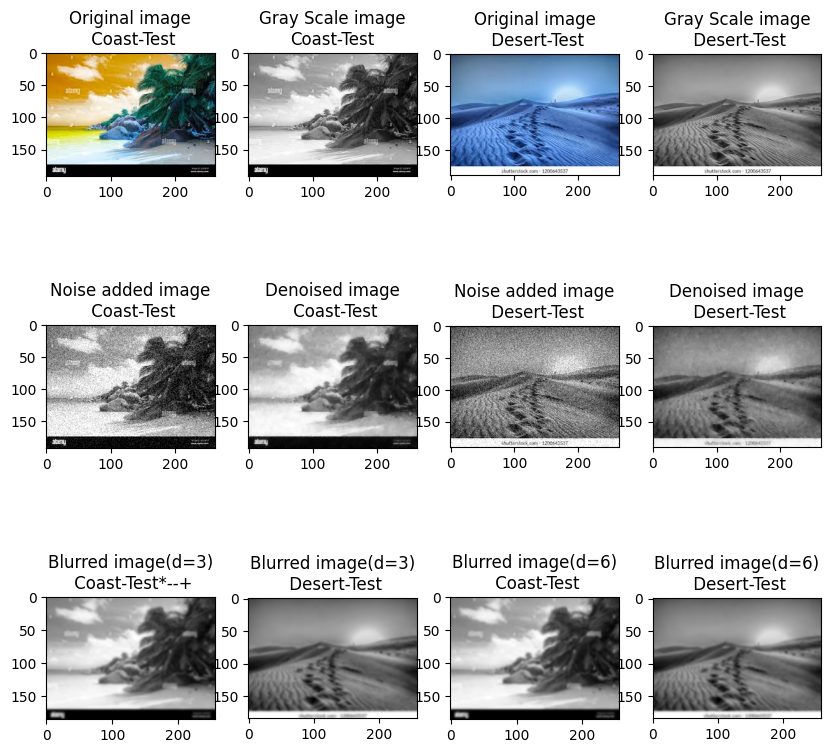

In [ ]:
#Step 3 EDA: Colour and Texture Analysis
#Conversion to Gray scale image needed for colour and texture analysis
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
%matplotlib inline

img_path_1 = '/content/drive/MyDrive/archive/Landscape Classification/Landscape Classification/Testing Data/Coast/Coast-Test (1).jpeg'
img_1 = cv2.imread(img_path_1)
img_path_2 = '/content/drive/MyDrive/archive/Landscape Classification/Landscape Classification/Testing Data/Desert/Desert-Test (1).jpeg'
img_2 = cv2.imread(img_path_2)

#gray scale conversion
img_1_gray = skic.rgb2gray(img_1)
img_2_gray = skic.rgb2gray(img_2)

# We add Gaussian noise and denoise using denoise_tv_bregman approach
#for img_1 and img_2
img_1_n = sku.random_noise(skic.rgb2gray(img_1))
img_1_d = skimage.restoration.denoise_tv_bregman(img_1_n, 5.)
img_2_n = sku.random_noise(skic.rgb2gray(img_2))
img_2_d = skimage.restoration.denoise_tv_bregman(img_2_n, 5.)

#Noise reduction using Gaussian Blur
d=3
img_1_blur3 = cv2.GaussianBlur(skic.rgb2gray(img_1), (2*d+1, 2*d+1), -1)[d:-d,d:-d]
img_2_blur3 = cv2.GaussianBlur(skic.rgb2gray(img_2), (2*d+1, 2*d+1), -1)[d:-d,d:-d]
img_1_blur6 = cv2.GaussianBlur(skic.rgb2gray(img_1), (2*d+1, 2*d+1), -1)[d:-d,d:-d]
img_2_blur6 = cv2.GaussianBlur(skic.rgb2gray(img_2), (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.figure(figsize=(10,10))
#VisualisingGray scale images visualisation
plt.subplot(341), plt.imshow(img_1),plt.title('Original image\n Coast-Test')
plt.subplot(342), plt.imshow(img_1_gray, cmap = 'gray'),plt.title('Gray Scale image\nCoast-Test')
plt.subplot(343), plt.imshow(img_2),plt.title('Original image\n Desert-Test')
plt.subplot(344), plt.imshow(img_2_gray, cmap = 'gray'),plt.title('Gray Scale image\n Desert-Test')

#Visualising Noising-Denoising images
plt.subplot(345), plt.imshow(img_1_n,cmap = 'gray'), plt.title('Noise added image\n Coast-Test')
plt.subplot(346), plt.imshow(img_1_d,cmap = 'gray'),plt.title('Denoised image\n Coast-Test')
plt.subplot(347), plt.imshow(img_2_n,cmap = 'gray'),plt.title('Noise added image\n Desert-Test')
plt.subplot(348), plt.imshow(img_2_d,cmap = 'gray'),plt.title('Denoised image\n Desert-Test')

#Visualising Noise Reduction with Gaussian Blurring
plt.subplot(349), plt.imshow(img_1_blur3,cmap = 'gray'), plt.title('Blurred image(d=3)\n Coast-Test*--+')
plt.subplot(3,4,10), plt.imshow(img_2_blur3,cmap = 'gray'),plt.title('Blurred image(d=3)\n Desert-Test')
plt.subplot(3,4,11), plt.imshow(img_1_blur6,cmap = 'gray'),plt.title('Blurred image(d=6)\n Coast-Test')
plt.subplot(3,4,12), plt.imshow(img_2_blur6,cmap = 'gray'),plt.title('Blurred image(d=6)\n Desert-Test')


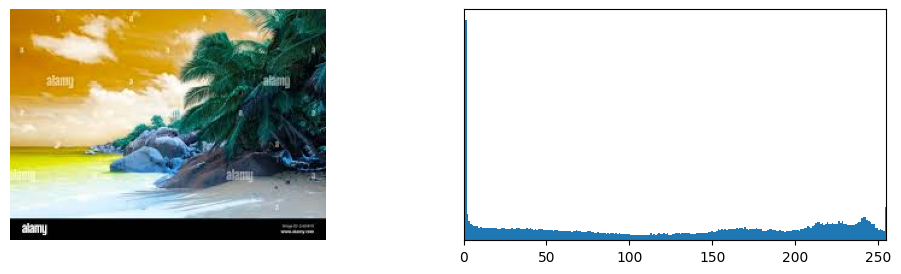

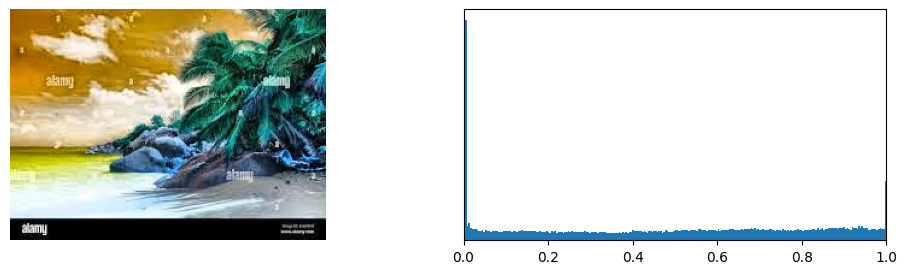

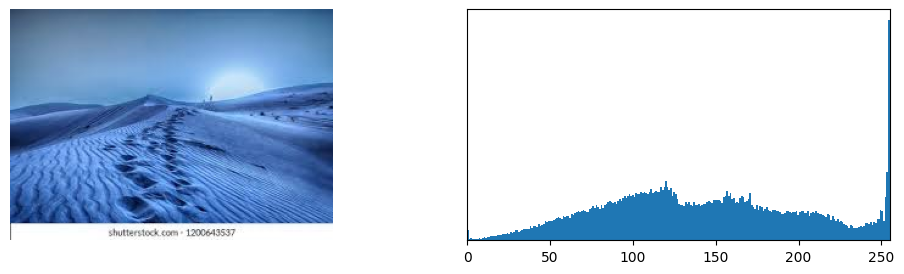

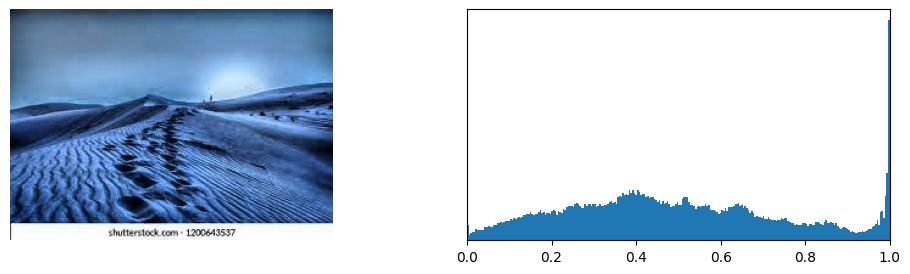

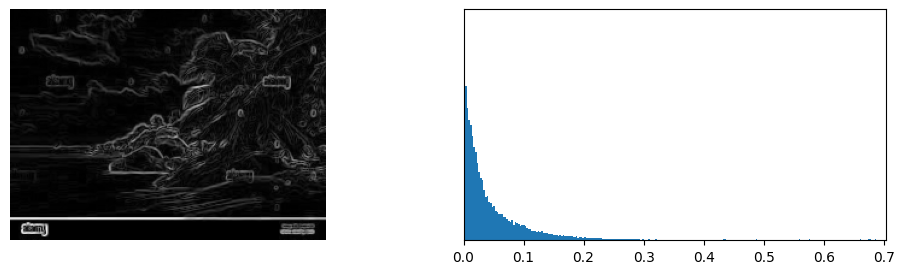

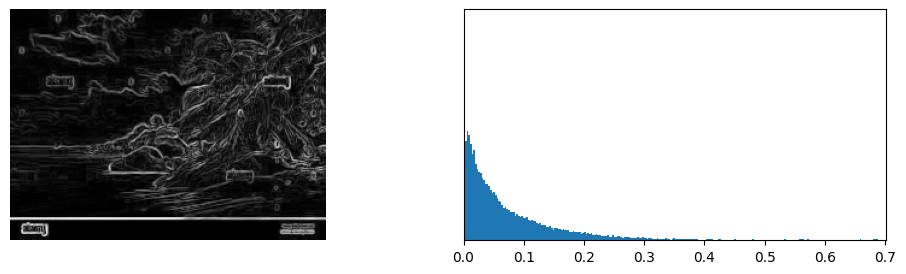

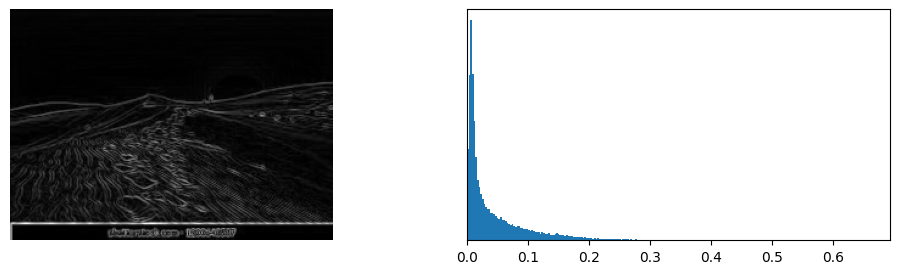

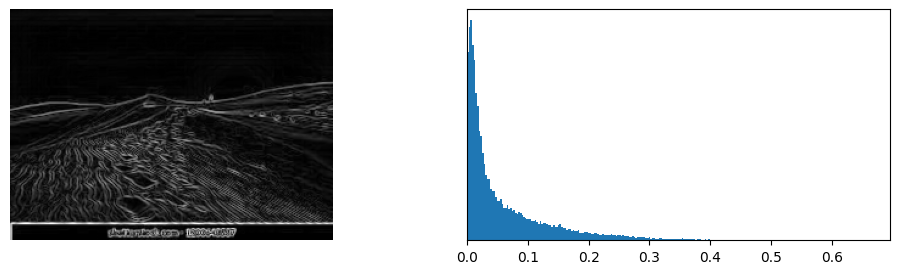

In [ ]:
#Step 5 EDA: Analysing illumination and lighting artefacts by examining the camera effects/exposure of an #image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
import skimage.exposure as skie
%matplotlib inline
img_path_1 = '/content/drive/MyDrive/archive/Landscape Classification/Landscape Classification/Testing Data/Coast/Coast-Test (1).jpeg'
img_1 = cv2.imread(img_path_1)
img_path_2 = '/content/drive/MyDrive/archive/Landscape Classification/Landscape Classification/Testing Data/Desert/Desert-Test (1).jpeg'
img_2 = cv2.imread(img_path_2)

def show(img):
    # Display the image.
    fig, (ax1, ax2) = plt.subplots(1, 2,
                                   figsize=(12, 3))
    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.set_axis_off()

    # Display the histogram.
    ax2.hist(img.ravel(), lw=0, bins=256)
    ax2.set_xlim(0, img.max())
    ax2.set_yticks([])
    plt.show()
show(img_1)
# adaptive histogram equalisation
show(skie.equalize_adapthist(img_1))

show(img_2)
# adaptive histogram equalisation
show(skie.equalize_adapthist(img_2))

#class 1 image
img = skic.rgb2gray(img_1)
sobimg_nheq= skif.sobel(img)
show(sobimg_nheq)
img = skic.rgb2gray(skie.equalize_adapthist(img_1))
sobimg_heq_1 = skif.sobel(img)
show(sobimg_heq_1)
#class 2 image
img = skic.rgb2gray(img_2)
sobimg_nheq= skif.sobel(img)
show(sobimg_nheq)
img = skic.rgb2gray(skie.equalize_adapthist(img_2))
sobimg_heq_2 = skif.sobel(img)
show(sobimg_heq_2)


(<Axes: title={'center': 'Image with Corners\n /Desert-Test'}>,
 Text(0.5, 1.0, 'Image with Corners\n /Desert-Test'))

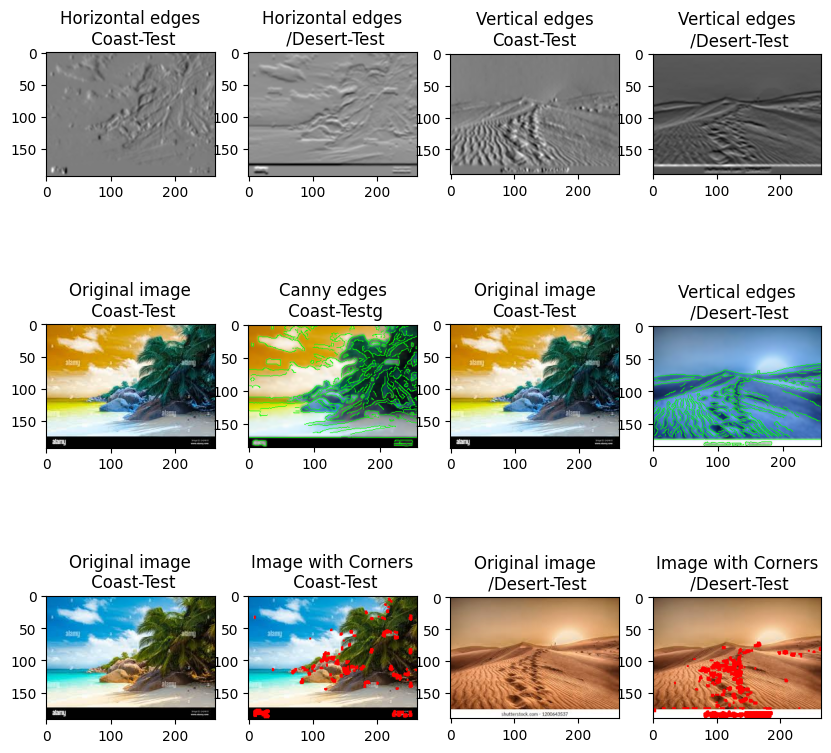

In [ ]:
#Step 4 EDA- Analysing Salient Discriminative Features (Edges and Corners) of images
#Conversion to Gray scale image needed for extracting edges and corners
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
%matplotlib inline
img_path_1 = '/content/drive/MyDrive/archive/Landscape Classification/Landscape Classification/Testing Data/Coast/Coast-Test (1).jpeg'
img_1 = cv2.imread(img_path_1)
img_path_2 = '/content/drive/MyDrive/archive/Landscape Classification/Landscape Classification/Testing Data/Desert/Desert-Test (1).jpeg'
img_2 = cv2.imread(img_path_2)
#Sobel edge detector
#edge detector works on gray scale images
sobel_img_1=cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
sobel_img_2=cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)
sobelx_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,1,0,ksize=9)
sobely_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,0,1,ksize=9)
sobelx_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,1,0,ksize=9)
sobely_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,0,1,ksize=9)
#Canny edge detector
#threshold selection
th1=30
th2=60
# Canny recommends threshold 2 is 3 times threshold 1
# you could try experimenting with this...
d=3
# gaussian blur
# this takes pixels in edgeresult where edge non-zero and colours them bright green
edgeresult_1=img_1.copy()
edgeresult_1 = cv2.GaussianBlur(edgeresult_1, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
gray_1 = cv2.cvtColor(edgeresult_1, cv2.COLOR_BGR2GRAY)
edge_1 = cv2.Canny(gray_1, th1, th2)
edgeresult_1[edge_1 != 0] = (0, 255, 0)
edgeresult_2=img_2.copy()
edgeresult_2 = cv2.GaussianBlur(edgeresult_2, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
gray_2 = cv2.cvtColor(edgeresult_2, cv2.COLOR_BGR2GRAY)
edge_2 = cv2.Canny(gray_2, th1, th2)
edgeresult_2[edge_2 != 0] = (0, 255, 0)
#Corner detector
#detecting corners for  image_1
harris_1=img_1.copy()
#greyscale it
gray = cv2.cvtColor(harris_1,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
blocksize=4 #
kernel_size=3 # sobel kernel: must be odd and fairly small
# run the harris corner detector
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05) # parameters are blocksize, Sobel parameter and Harris threshold
#result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst,None)
#we then plot these on the input image for visualisation purposes, using bright red
harris_1[dst>0.01*dst.max()]=[0,0,255]
#detecting corners for image_2
harris_2=img_2.copy()
#greyscale it
gray = cv2.cvtColor(harris_2,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
blocksize=4 #
kernel_size=3 # sobel kernel: must be odd and fairly small
# run the harris corner detector
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05)
# parameters are blocksize, Sobel parameter and Harris threshold
#result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst,None)
#we then plot these on the input image for visualisation purposes, using bright red
harris_2[dst>0.01*dst.max()]=[0,0,255]

#Visualisng Edges and Corners
plt.figure(figsize=(10,10))
#Visualising Sobel Edges
plt.subplot(341), plt.imshow(sobelx_img_1, cmap = 'gray'),plt.title('Horizontal edges\n Coast-Test')
plt.subplot(342), plt.imshow(sobely_img_1, cmap = 'gray'),plt.title('Horizontal edges\n /Desert-Test')
plt.subplot(343), plt.imshow(sobelx_img_2, cmap = 'gray'),plt.title('Vertical edges\nCoast-Test')
plt.subplot(344), plt.imshow(sobely_img_2, cmap = 'gray'),plt.title('Vertical edges\n /Desert-Test')
#Visualising Canny Edges
plt.subplot(345), plt.imshow(img_1),plt.title('Original image\n Coast-Test')
plt.subplot(346), plt.imshow(edgeresult_1, cmap = 'gray'),plt.title('Canny edges\n Coast-Testg')
plt.subplot(347), plt.imshow(img_1),plt.title('Original image\nCoast-Test')
plt.subplot(348), plt.imshow(edgeresult_2, cmap = 'gray'),plt.title('Vertical edges\n /Desert-Test')
#Visualising Corners
plt.subplot(349), plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)),plt.title('Original image\n Coast-Test')
plt.subplot(3,4,10), plt.imshow(cv2.cvtColor(harris_1, cv2.COLOR_BGR2RGB)),plt.title('Image with Corners\n Coast-Test')
plt.subplot(3,4,11), plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)),plt.title('Original image\n /Desert-Test')
plt.subplot(3,4,12), plt.imshow(cv2.cvtColor(harris_2, cv2.COLOR_BGR2RGB)),plt.title('Image with Corners\n /Desert-Test')
